In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In this notebook, we perform Exploratory Data Analysis (EDA) on the NSL-KDD dataset for reproducing the results of the paper “A Robust Comparison of the KDDCup99 and NSL-KDD IoT Network Intrusion Detection Datasets Through Various Machine Learning Algorithms.”
The goal is to understand class distribution, feature types, imbalance, and train–test differences before applying machine learning models.

In [2]:
train = pd.read_csv("C:/Users/Shantanu Ojha/Desktop/nsl-kdd-classical-ids-reproduction/data/raw/KDDTrain+.txt", header=None)
test = pd.read_csv("C:/Users/Shantanu Ojha/Desktop/nsl-kdd-classical-ids-reproduction/data/raw/KDDTest+.TXT", header=None)

In [3]:
columns = [
 'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
 'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
 'root_shell','su_attempted','num_root','num_file_creations','num_shells',
 'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
 'count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
 'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
 'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate','dst_host_serror_rate',
 'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
 'label','difficulty'
]

train.columns = columns
test.columns = columns

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.isnull().sum().sum(), "missing values")
print(test.isnull().sum().sum(), "missing values")


Train shape: (125973, 43)
Test shape: (22544, 43)
0 missing values
0 missing values


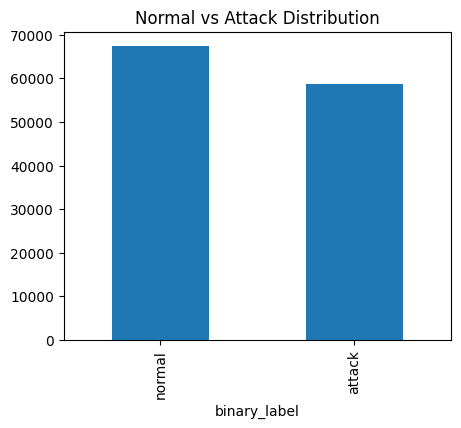

In [7]:
train['binary_label'] = train['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

plt.figure(figsize=(5,4))
train['binary_label'].value_counts().plot(kind='bar')
plt.title("Normal vs Attack Distribution")
plt.show()

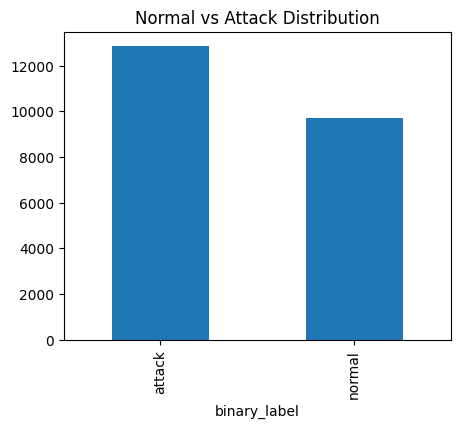

In [19]:
test['binary_label'] = test['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

plt.figure(figsize=(5,4))
test['binary_label'].value_counts().plot(kind='bar')
plt.title("Normal vs Attack Distribution")
plt.show()

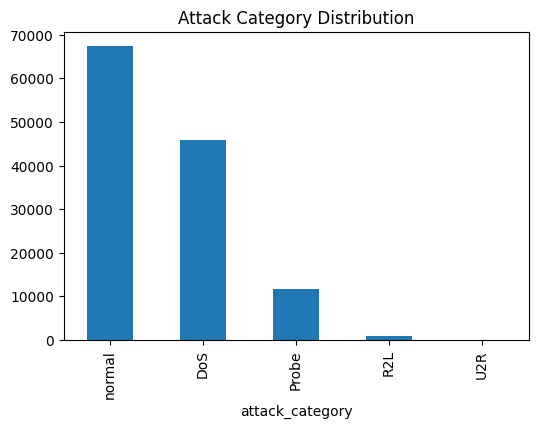

In [8]:
attack_map = {
    'normal':'normal',
    'neptune':'DoS','smurf':'DoS','back':'DoS','teardrop':'DoS','pod':'DoS',
    'satan':'Probe','ipsweep':'Probe','nmap':'Probe','portsweep':'Probe',
    'guess_passwd':'R2L','ftp_write':'R2L','imap':'R2L','phf':'R2L',
    'multihop':'R2L','warezmaster':'R2L','warezclient':'R2L',
    'buffer_overflow':'U2R','loadmodule':'U2R','rootkit':'U2R','perl':'U2R'
}

train['attack_category'] = train['label'].map(attack_map)

plt.figure(figsize=(6,4))
train['attack_category'].value_counts().plot(kind='bar')
plt.title("Attack Category Distribution")
plt.show()

The dataset is highly imbalanced across the five intrusion classes.

DoS and Normal dominate the dataset.

Probe is moderately represented.

R2L is scarce.

U2R is extremely rare, making it the hardest class to learn.

This severe imbalance is expected to cause poor recall for U2R and R2L, which is also reported in the reproduced paper where U2R recall approaches zero.

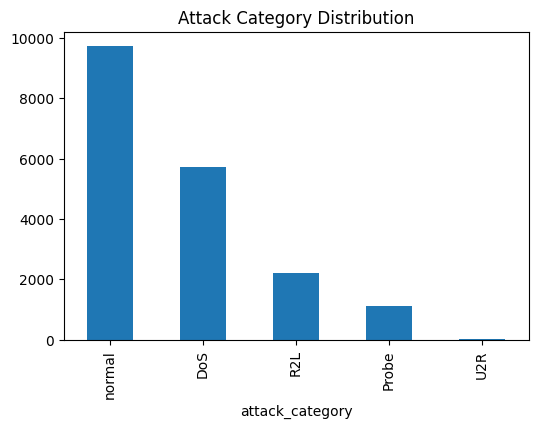

In [20]:
attack_map = {
    'normal':'normal',
    'neptune':'DoS','smurf':'DoS','back':'DoS','teardrop':'DoS','pod':'DoS',
    'satan':'Probe','ipsweep':'Probe','nmap':'Probe','portsweep':'Probe',
    'guess_passwd':'R2L','ftp_write':'R2L','imap':'R2L','phf':'R2L',
    'multihop':'R2L','warezmaster':'R2L','warezclient':'R2L',
    'buffer_overflow':'U2R','loadmodule':'U2R','rootkit':'U2R','perl':'U2R'
}

test['attack_category'] = test['label'].map(attack_map)

plt.figure(figsize=(6,4))
test['attack_category'].value_counts().plot(kind='bar')
plt.title("Attack Category Distribution")
plt.show()

The training and testing sets of NSL-KDD are not identically distributed.
The test set contains a higher proportion of attack samples and includes more difficult patterns, which explains why models achieve lower recall and generalization performance on NSL-KDD compared to KDDCup99.

In [9]:
categorical = ['protocol_type','service','flag']
numeric = train.drop(columns=['label','difficulty','binary_label','attack_category'] + categorical).columns
print("Categorical features:", categorical)



Categorical features: ['protocol_type', 'service', 'flag']


NSL-KDD consists of:

Continuous features (duration, bytes, counts)

Categorical features (protocol_type, service, flag)
These categorical features require one-hot encoding before model training, which increases dimensionality and sparsity.


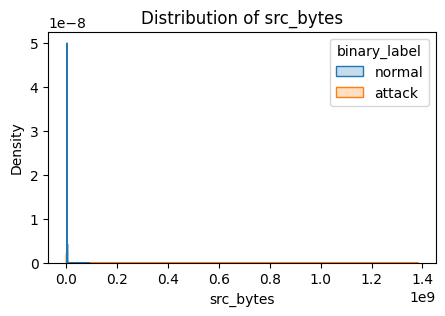

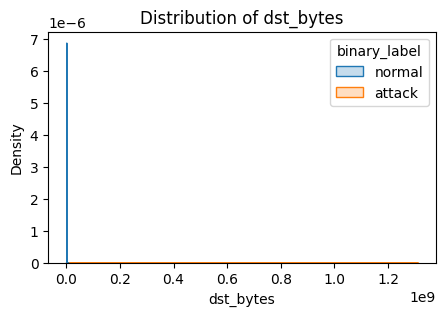

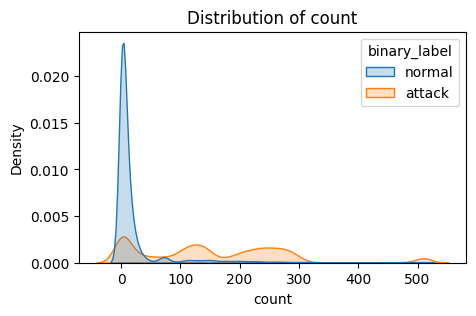

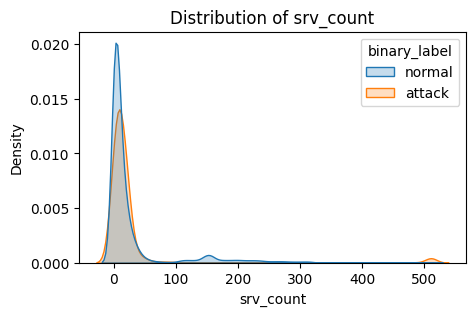

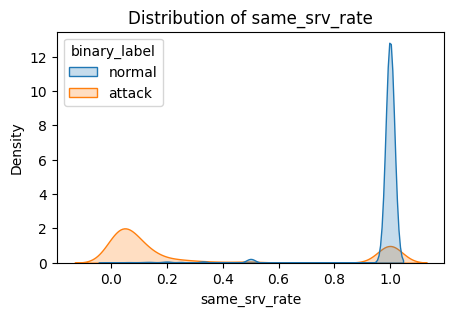

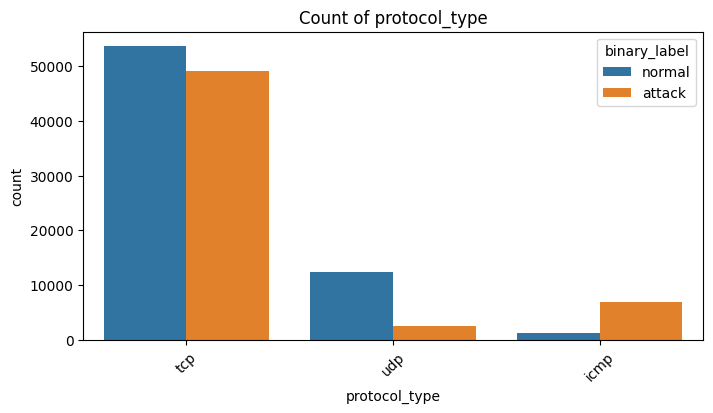

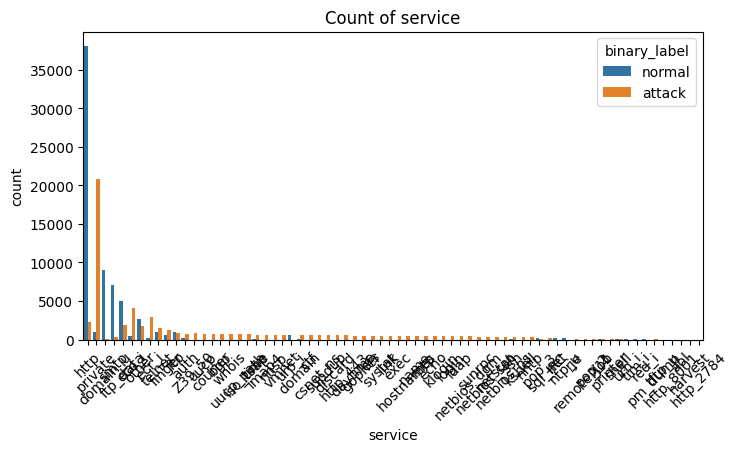

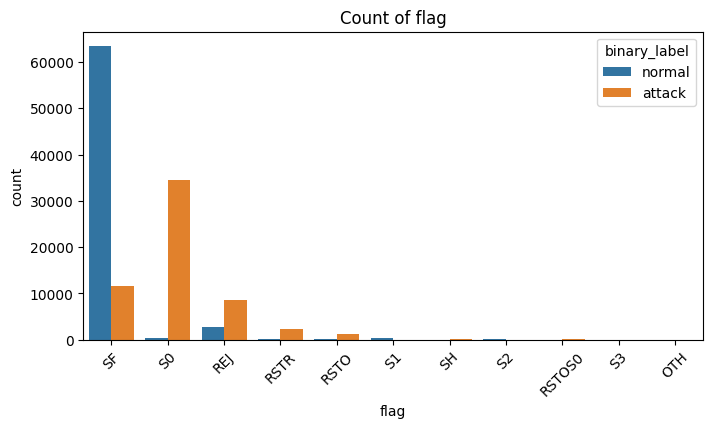

In [10]:
key_features = ['src_bytes','dst_bytes','count','srv_count','same_srv_rate']

for col in key_features:
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=train, x=col, hue='binary_label', fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()
for col in categorical:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train, x=col, hue='binary_label', order=train[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


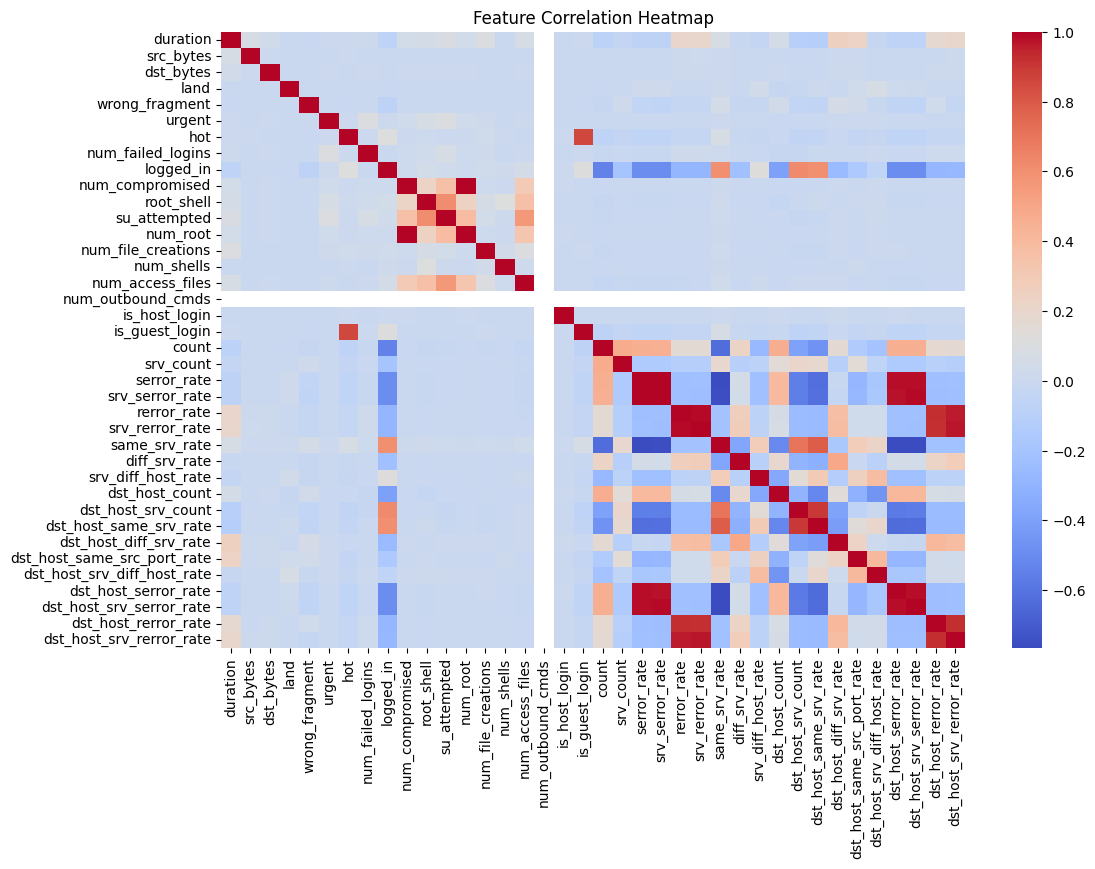

In [11]:
plt.figure(figsize=(12,8))
corr = train[numeric].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



A Pearson correlation heatmap was generated to study linear dependencies among numerical features.
Several traffic-based features (such as byte counts, connection rates, and error statistics) exhibit strong positive correlations, indicating redundancy and shared information.

These correlations explain why volume-based attacks (DoS, Probe) are easier to detect, as they manifest clear statistical signatures.

In contrast, U2R and R2L attacks do not correspond to any strongly correlated feature group, which supports the observed poor recall for these classes in both classical and neural classifiers.

The reduced redundancy in NSL-KDD compared to KDDCup99 further increases classification difficulty, validating the paper’s conclusion that NSL-KDD is a more challenging and realistic benchmark.

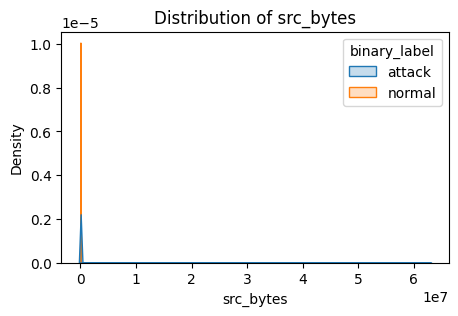

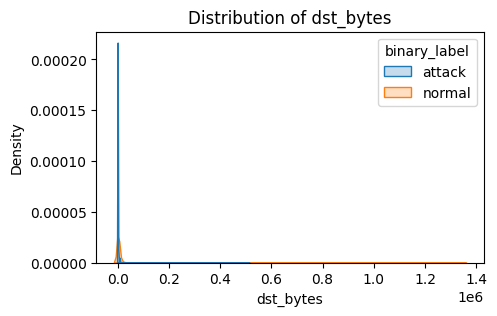

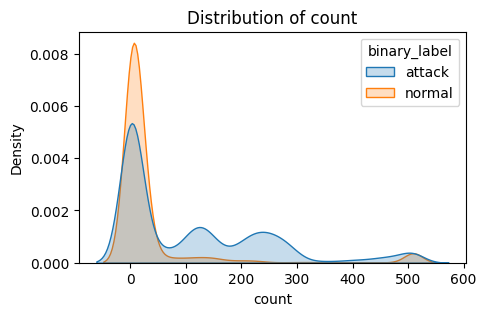

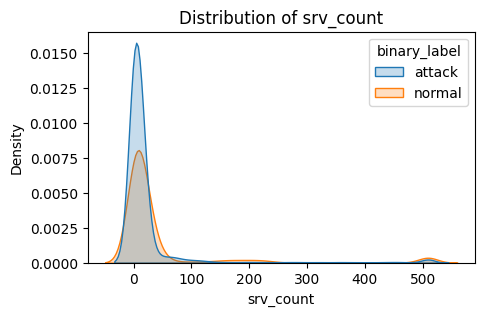

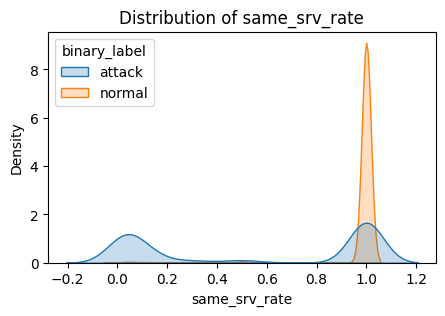

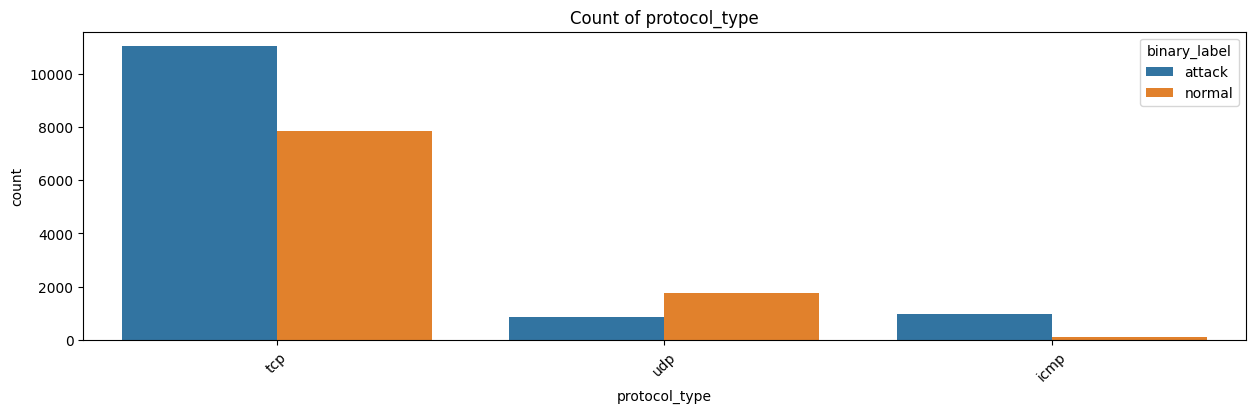

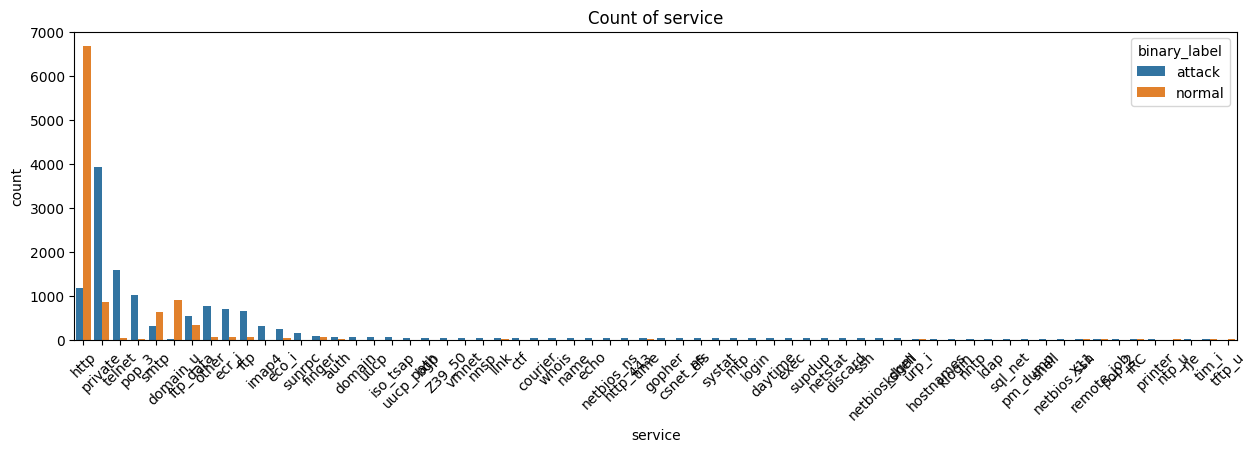

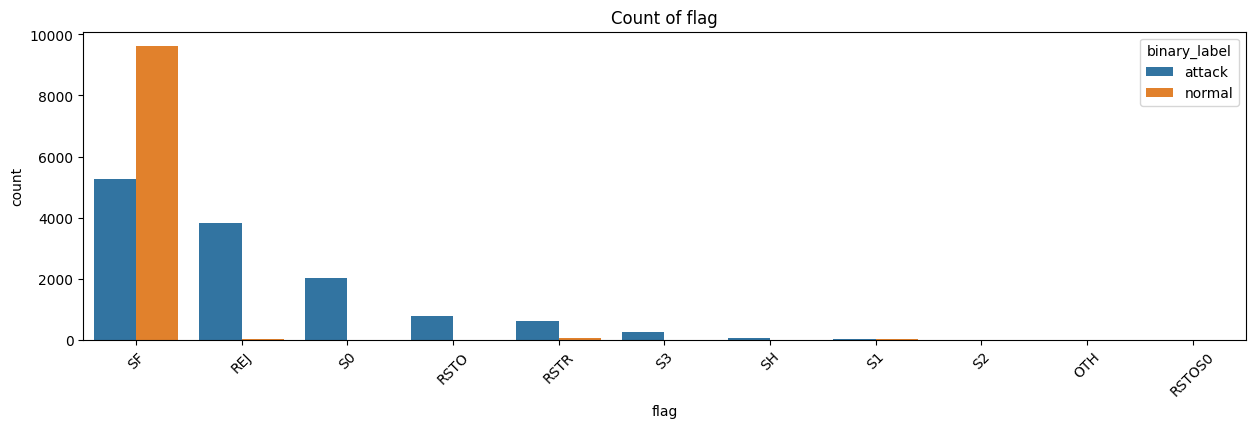

In [14]:
key_features = ['src_bytes','dst_bytes','count','srv_count','same_srv_rate']

for col in key_features:
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=test, x=col, hue='binary_label', fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()
for col in categorical:
    plt.figure(figsize=(15,4))
    sns.countplot(data=test, x=col, hue='binary_label', order=test[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

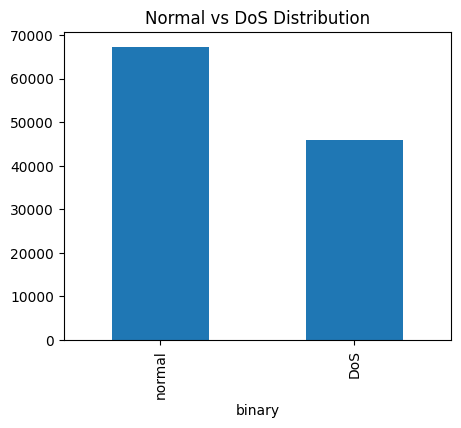

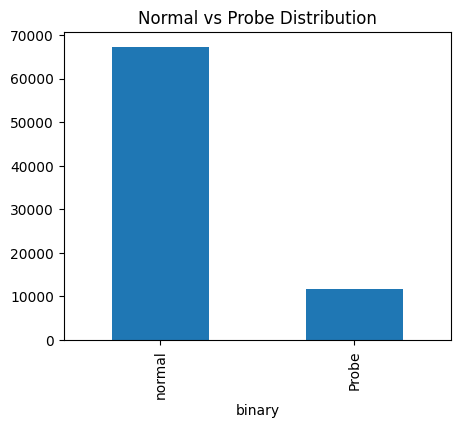

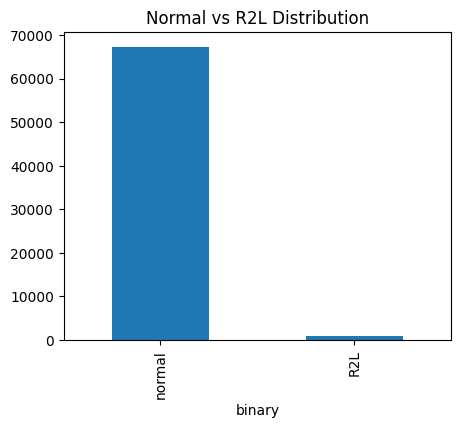

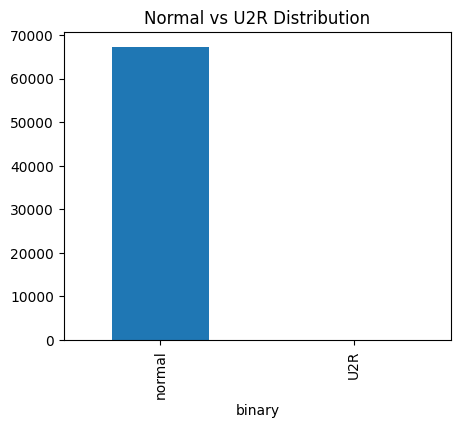

In [15]:
def plot_normal_vs(category):
    temp = train.copy()
    temp['binary'] = temp['attack_category'].apply(
        lambda x: 'normal' if x == 'normal' else (category if x == category else 'other')
    )
    
    temp = temp[temp['binary'].isin(['normal', category])]
    
    plt.figure(figsize=(5,4))
    temp['binary'].value_counts().plot(kind='bar')
    plt.title(f"Normal vs {category} Distribution")
    plt.show()

plot_normal_vs('DoS')
plot_normal_vs('Probe')
plot_normal_vs('R2L')
plot_normal_vs('U2R')

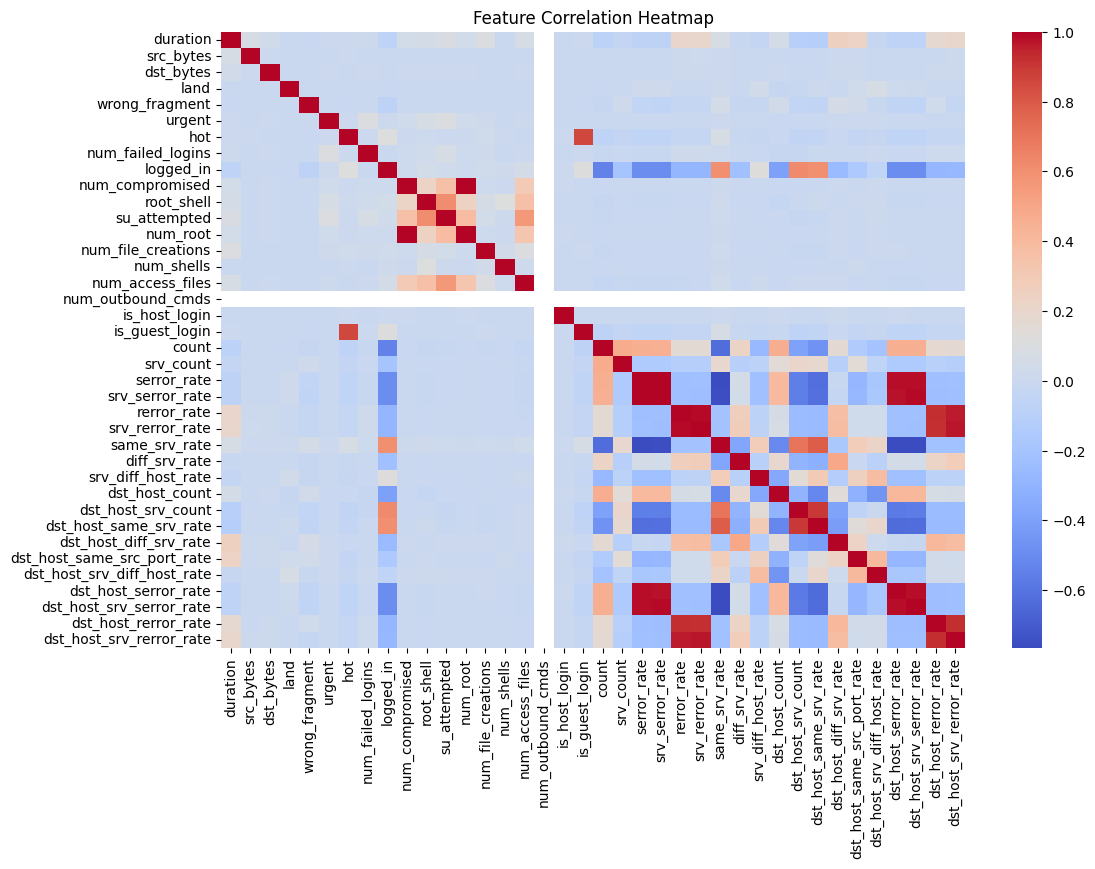

In [16]:
plt.figure(figsize=(12,8))
corr = train[numeric].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

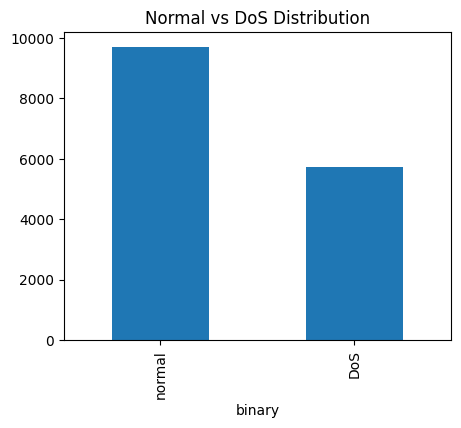

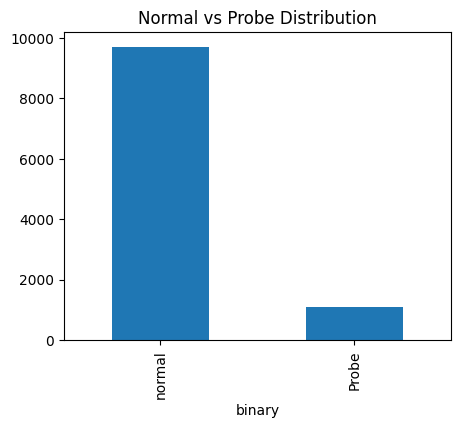

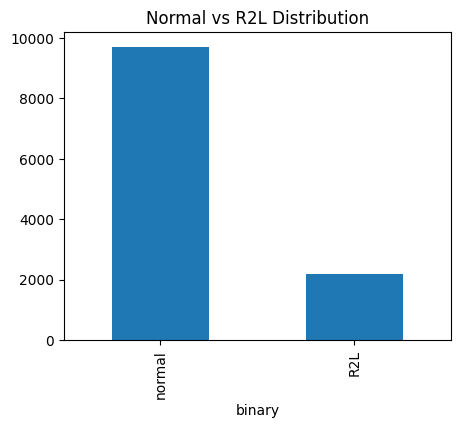

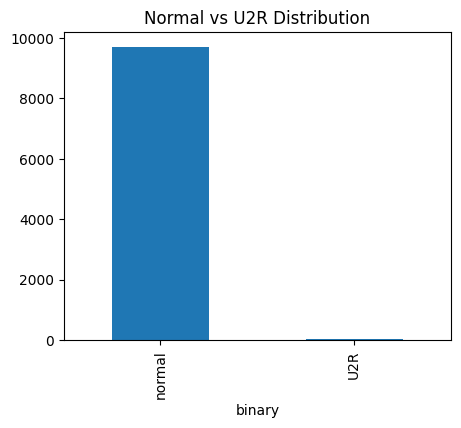

In [17]:
def plot_normal_vs(category):
    temp = test.copy()
    temp['binary'] = temp['attack_category'].apply(
        lambda x: 'normal' if x == 'normal' else (category if x == category else 'other')
    )
    
    temp = temp[temp['binary'].isin(['normal', category])]
    
    plt.figure(figsize=(5,4))
    temp['binary'].value_counts().plot(kind='bar')
    plt.title(f"Normal vs {category} Distribution")
    plt.show()

plot_normal_vs('DoS')
plot_normal_vs('Probe')
plot_normal_vs('R2L')
plot_normal_vs('U2R')